## Package Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Retrieve data from Dataset

In [3]:
data = pd.read_csv("./archive/heart.csv")

## Dataset statistics

Top rows of the dataset

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset statistics summary

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Dataset shape

In [10]:
print(data.shape)

(303, 14)


How many unique values are there in the dataset for each column?

## Output distribution

Text(0, 0.5, 'Count')

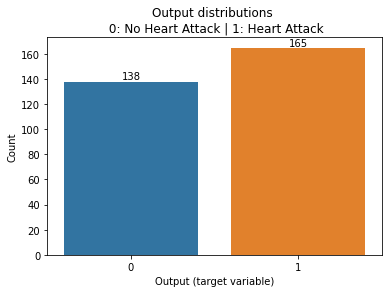

In [44]:
ax = sns.countplot(x='output', data=data)
ax.bar_label(ax.containers[0])
plt.title('Output distributions \n 0: No Heart Attack | 1: Heart Attack', fontsize=12)
plt.xlabel('Output (target variable)')
plt.ylabel('Count')

## Count distribution per Age

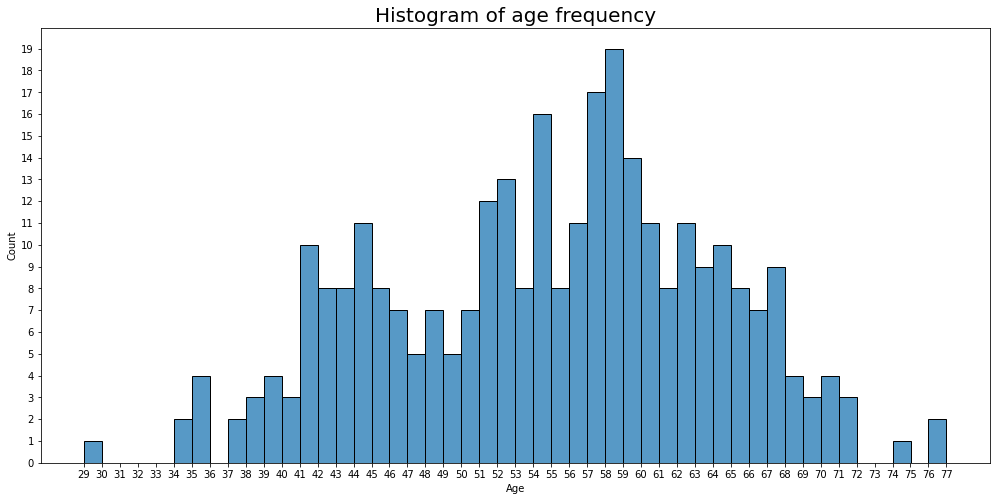

In [39]:
age = data['age']

min_age = min(age)
max_age = max(age)

min_count = 0
max_count = max(age.value_counts())

plt.figure(figsize=(17,8))
plt.title("Histogram of age frequency",size=20)

sns.histplot(data['age'], bins=max_age-min_age)
plt.xticks(list(range(min_age,max_age+1,1)))
plt.yticks(list(range(min_count,max_count+1,1)))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Count distribution per Sex

Pie Chart

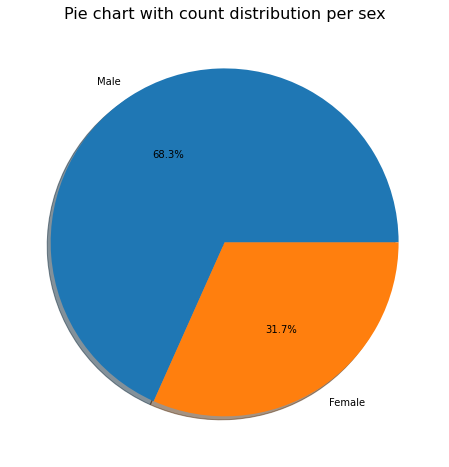

In [46]:
sex = data['sex']
plt.figure(figsize=(8,8), facecolor="white")
plt.title("Pie chart with count distribution per sex", fontsize=16)
plt.pie(sex.value_counts(), labels=["Male","Female"], shadow=True, autopct='%1.1f%%')
plt.show()

Bar Chart

Text(0, 0.5, 'Count')

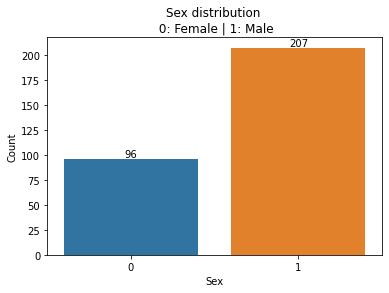

In [47]:
ax = sns.countplot(x='sex', data=data)
ax.bar_label(ax.containers[0])
plt.title('Sex distribution \n 0: Female | 1: Male', fontsize=12)
plt.xlabel('Sex')
plt.ylabel('Count')


The two previous graphs demonstrate that the dataset has 207 males (68.3%) and 96 females (31.7%)